In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Ready")

Ready


In [2]:
df = pd.read_csv(r"C:\Anaconda\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_male = df[df['Sex'] == 'male']
len(df_male)

577

In [5]:
df_female = df[df['Sex'] == 'female']
len(df_female)

314

In [6]:
df_sex = df[["Sex"]].groupby("Sex").value_counts()
df_sex

Sex
female    314
male      577
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

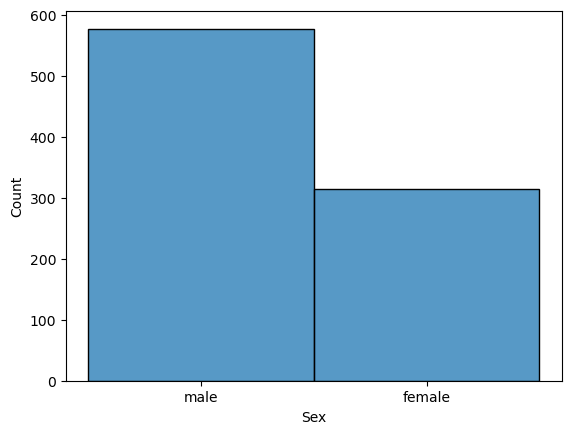

In [7]:
sns.histplot(df['Sex'])

<Axes: xlabel='Age', ylabel='Density'>

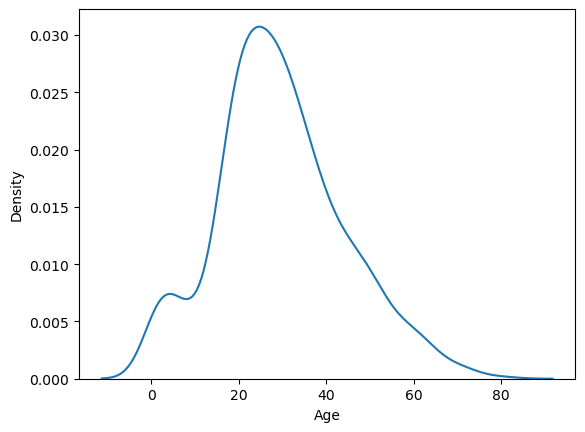

In [8]:
sns.kdeplot(data = df["Age"])

In [9]:
df['Age'].mean()

29.69911764705882

In [10]:
df['Age'].median()

28.0

In [11]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

Первичный анализ датасета Titanic:

• В датасете 891 пассажир и 12 признаков. 
• Пропуски присутствуют в столбцах Age, Cabin и Embarked — 
  особенно много отсутствующих значений в Cabin, 
  что делает этот признак практически бесполезным.
• Соотношение полов неравномерное: мужчин — 577, женщин — 314. 
  На борту было примерно в 1.8 раза больше мужчин.
• Распределение возраста показывает, что большинство пассажиров были 
  молодыми людьми — средний возраст составляет 29.7 лет, медиана — 28 лет, 
  наиболее частое значение (мода) — 24 года.


C:\Users\Аскар\AppData\Local\Temp\ipykernel_3236\3031098910.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='viridis')


<Axes: xlabel='Pclass', ylabel='count'>

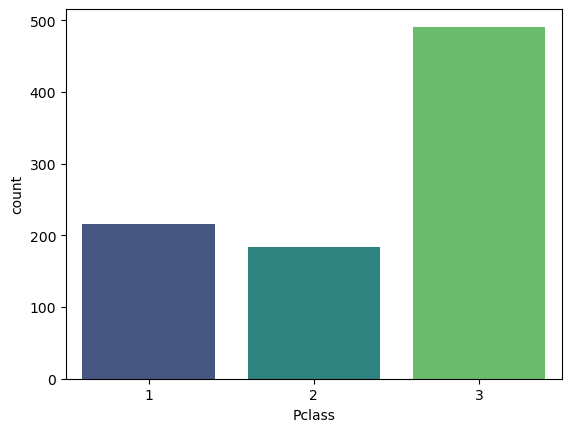

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', data=df, palette='viridis')

In [13]:
df_class= df.groupby('Pclass').Survived.value_counts().unstack()
df_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

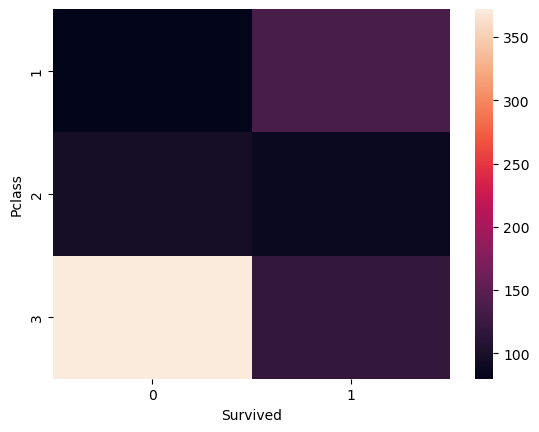

In [14]:
sns.heatmap(data = df_class)

In [15]:
df_melted = df_class.reset_index().melt(
    id_vars='Pclass',
    var_name='Survived',
    value_name='Count'
)

<Axes: xlabel='Pclass', ylabel='Count'>

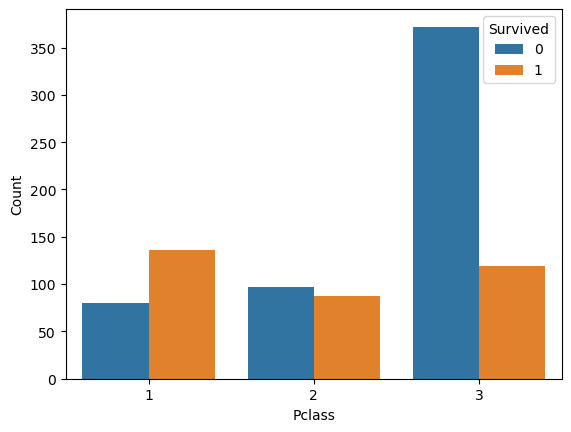

In [16]:
sns.barplot(
    data=df_melted,
    x='Pclass',
    y='Count',
    hue='Survived'
)

In [17]:
df_class['Total'] = df_class.sum(axis=1)
df_class

Survived,0,1,Total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491


In [18]:
df_class['procent'] = (df_class[1]/df_class["Total"]) * 100
df_class

Survived,0,1,Total,procent
Pclass,,,,
1,80,136,216,62.962963
2,97,87,184,47.282609
3,372,119,491,24.236253


<Axes: xlabel='Pclass', ylabel='procent'>

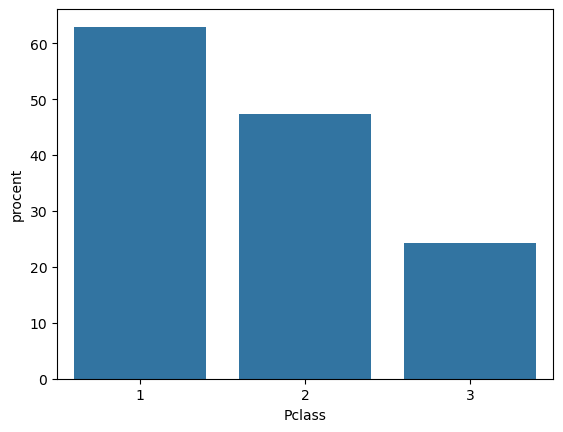

In [19]:
sns.barplot(x=df_class.index,y=df_class['procent'])

<Axes: xlabel='Pclass', ylabel='Age'>

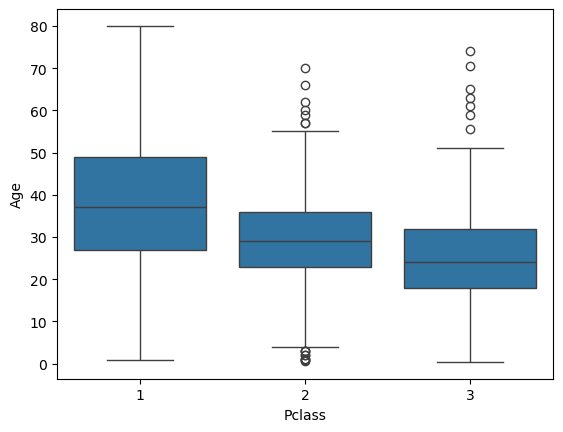

In [20]:
sns.boxplot(x='Pclass', y='Age', data=df)

Titanic EDA — День 2 (Pclass)

1. В датасете наблюдается сильный дисбаланс по классам: 
   3-й класс самый многочисленный (491 человек), 
   1-й — 216, 2-й — 184. Большинство пассажиров путешествовали в эконом-классе.

2. Выживаемость резко различается между классами:
   • 1-й класс — около 63% выживших  
   • 2-й класс — около 47%  
   • 3-й класс — всего около 24%

   Таким образом, пассажиры 1-го класса выживали примерно в 2.6 раза чаще, чем пассажиры 3-го.

3. Анализ возраста показывает, что пассажиры 1-го класса в среднем старше 
   (медиана около 38 лет), а 3-й класс включает много молодых пассажиров 
   и детей (медиана около 25 лет).

4. Возраст и класс коррелируют между собой, 
   а также оба являются важными факторами выживаемости. 
   Социальное положение явно играло роль в шансах спасения.


<Axes: xlabel='SibSp', ylabel='count'>

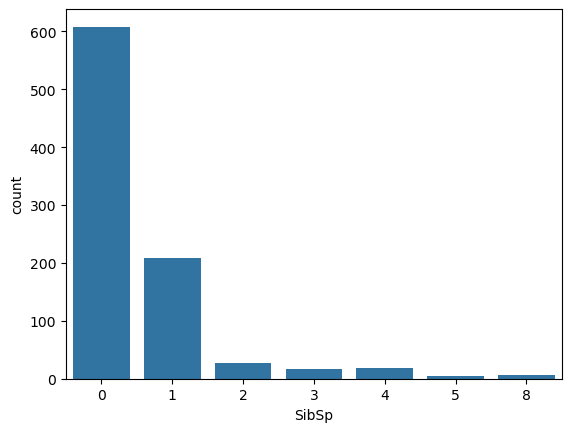

In [22]:
sns.countplot(x = 'SibSp',data =df)

<Axes: xlabel='Parch', ylabel='count'>

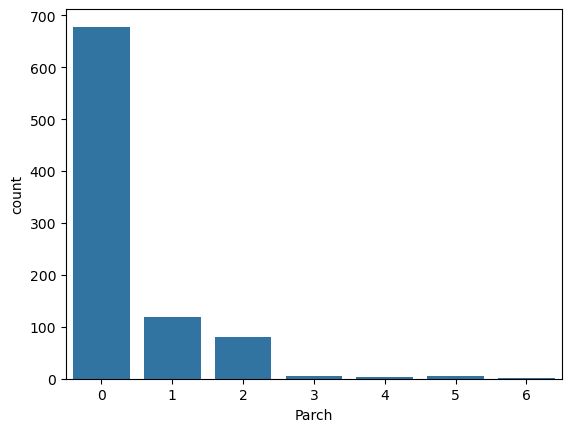

In [23]:
sns.countplot(x='Parch',data =df)

<Axes: xlabel='SibSp', ylabel='Survived'>

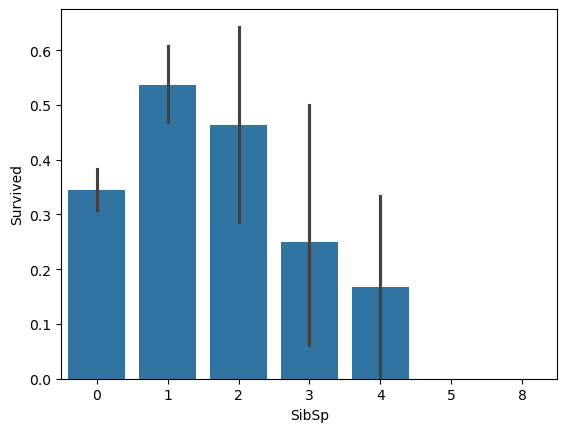

In [24]:
sns.barplot(x='SibSp',y = 'Survived',data = df)

<Axes: xlabel='Parch', ylabel='Survived'>

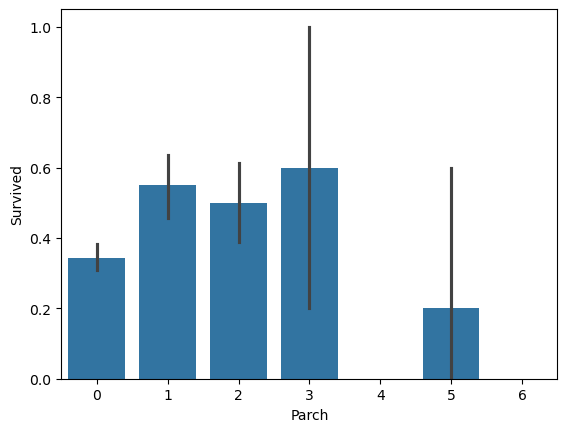

In [25]:
sns.barplot(x='Parch',y = 'Survived',data = df)

C:\Users\Аскар\AppData\Local\Temp\ipykernel_3236\3126705677.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['Fare'], shade=True)


<Axes: xlabel='Fare', ylabel='Density'>

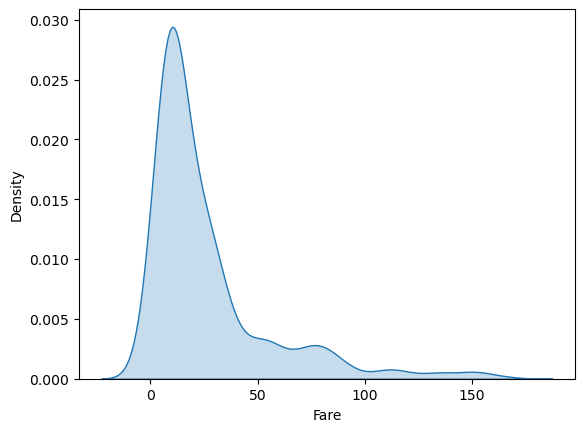

In [39]:
df_clean = df[df['Fare'] < 200]

sns.kdeplot(df_clean['Fare'], shade=True)

In [32]:
df["Fare"].mean()

32.204207968574636

In [33]:
df["Fare"].max()

512.3292

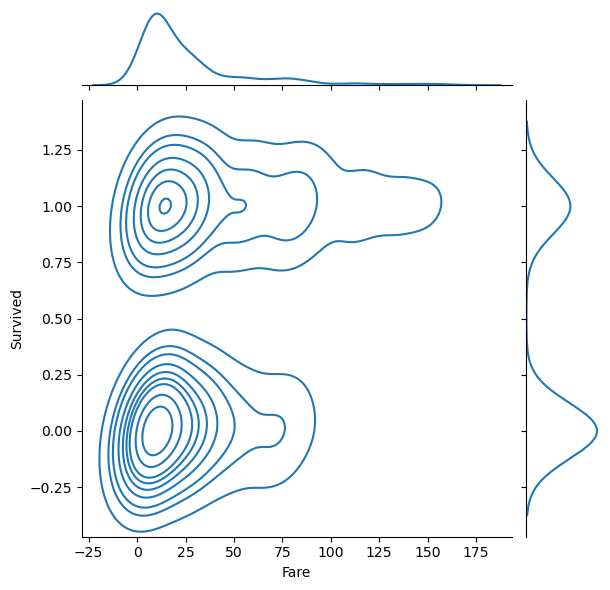

In [40]:
sns.jointplot(x=df_clean['Fare'], y=df['Survived'], kind="kde")



1. **SibSp (братья/сёстры/супруги).**
   Большинство пассажиров ехали без родственников. 
   Наивысшая вероятность выживания наблюдается у пассажиров, которые путешествовали 
   с 1–2 родственниками. Одиночки выживали хуже, а большие семьи (3 и более человек) 
   имели самый низкий шанс выжить.

2. **Parch (родители/дети).**
   Аналогично SibSp: большинство пассажиров путешествовали одни. 
   Наличие 1–2 родственников повышало шанс выживания, 
   тогда как большие семьи (3+) выживали значительно хуже.

3. **Стоимость билета (Fare).**
   Стоимость билета имеет сильное смещение: большинство пассажиров покупали дешёвые билеты, 
   но встречаются и очень дорогие (максимальное значение около 512 — явный выброс).
   Средняя стоимость составляет примерно 32.

4. **Связь стоимости билета и выживаемости.**
   У выживших медианная стоимость билета заметно выше, чем у погибших. 
   Это подтверждает общий вывод: пассажиры с более дорогими билетами и более высоким классом 
   имели значительно больший шанс выжить.

### Итог
Небольшие семьи (1–2 человека) и высокая стоимость билета были положительными факторами 
для выживаемости. Большие семьи и дешёвые билеты — наоборот, снижали шанс спасения.
